In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.


In [2]:
from Simulator1 import simulator

In [3]:
env = simulator()
nb_actions = env.action_space.n
env.observation_space, env.action_space

(Box(1,), Discrete(2))

In [4]:
env.observation_space, env.action_space.n

(Box(1,), 2)

In [5]:
env.render()

choice(0) - conversions: [0], reactors: []


In [6]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(nb_actions, activation = 'linear'))
print(model.summary())


W0906 11:22:58.062011  2464 deprecation_wrapper.py:119] From C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 11:22:58.101700  2464 deprecation_wrapper.py:119] From C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 11:22:58.135567  2464 deprecation_wrapper.py:119] From C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total params: 610
Trainable params: 610
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

W0906 11:22:58.301159  2464 deprecation_wrapper.py:119] From C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0906 11:22:58.302158  2464 deprecation_wrapper.py:119] From C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\keras\backend\tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0906 11:22:58.518352  2464 deprecation_wrapper.py:119] From C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
hist = dqn.fit(env, nb_steps=5000, verbose=2)

Training for 5000 steps ...
    9/5000: episode: 1, duration: 0.149s, episode steps: 9, steps per second: 60, episode reward: 0.672, mean reward: 0.075 [0.000, 0.414], mean action: 0.000 [0.000, 0.000], mean observation: 0.626 [0.256, 0.672], loss: --, mean_absolute_error: --, mean_q: --


C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\rl\memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   18/5000: episode: 2, duration: 1.176s, episode steps: 9, steps per second: 8, episode reward: 0.672, mean reward: 0.075 [0.000, 0.414], mean action: 0.000 [0.000, 0.000], mean observation: 0.626 [0.256, 0.672], loss: 0.017605, mean_absolute_error: 0.073634, mean_q: 0.029320
   27/5000: episode: 3, duration: 0.037s, episode steps: 9, steps per second: 243, episode reward: 0.672, mean reward: 0.075 [0.000, 0.414], mean action: 0.000 [0.000, 0.000], mean observation: 0.626 [0.256, 0.672], loss: 0.008766, mean_absolute_error: 0.058058, mean_q: 0.045074
   36/5000: episode: 4, duration: 0.035s, episode steps: 9, steps per second: 258, episode reward: 0.672, mean reward: 0.075 [0.000, 0.414], mean action: 0.000 [0.000, 0.000], mean observation: 0.626 [0.256, 0.672], loss: 0.011887, mean_absolute_error: 0.066897, mean_q: 0.047201
   45/5000: episode: 5, duration: 0.035s, episode steps: 9, steps per second: 261, episode reward: 0.965, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0

C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\rl\memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
C:\Users\meatrobot\Anaconda3\envs\RL\lib\site-packages\rl\memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   71/5000: episode: 9, duration: 0.019s, episode steps: 4, steps per second: 209, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.002811, mean_absolute_error: 0.036221, mean_q: 0.062003
   75/5000: episode: 10, duration: 0.019s, episode steps: 4, steps per second: 213, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.003224, mean_absolute_error: 0.045386, mean_q: 0.083772
   79/5000: episode: 11, duration: 0.017s, episode steps: 4, steps per second: 230, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.002047, mean_absolute_error: 0.059382, mean_q: 0.108088
   83/5000: episode: 12, duration: 0.018s, episode steps: 4, steps per second: 228, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.5

  209/5000: episode: 43, duration: 0.024s, episode steps: 5, steps per second: 209, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000865, mean_absolute_error: 0.188426, mean_q: 0.415586
  213/5000: episode: 44, duration: 0.018s, episode steps: 4, steps per second: 220, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000911, mean_absolute_error: 0.173964, mean_q: 0.377055
  217/5000: episode: 45, duration: 0.016s, episode steps: 4, steps per second: 250, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000765, mean_absolute_error: 0.173139, mean_q: 0.398686
  222/5000: episode: 46, duration: 0.019s, episode steps: 5, steps per second: 269, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.

  351/5000: episode: 78, duration: 0.019s, episode steps: 4, steps per second: 215, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000957, mean_absolute_error: 0.210604, mean_q: 0.470519
  355/5000: episode: 79, duration: 0.017s, episode steps: 4, steps per second: 239, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000843, mean_absolute_error: 0.219921, mean_q: 0.482086
  359/5000: episode: 80, duration: 0.017s, episode steps: 4, steps per second: 235, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000983, mean_absolute_error: 0.199332, mean_q: 0.435594
  363/5000: episode: 81, duration: 0.016s, episode steps: 4, steps per second: 253, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.

  504/5000: episode: 116, duration: 0.019s, episode steps: 4, steps per second: 211, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000773, mean_absolute_error: 0.251260, mean_q: 0.519885
  508/5000: episode: 117, duration: 0.017s, episode steps: 4, steps per second: 238, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000132, mean_absolute_error: 0.257678, mean_q: 0.548009
  512/5000: episode: 118, duration: 0.016s, episode steps: 4, steps per second: 253, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000850, mean_absolute_error: 0.239433, mean_q: 0.496657
  516/5000: episode: 119, duration: 0.016s, episode steps: 4, steps per second: 245, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action

  646/5000: episode: 149, duration: 0.016s, episode steps: 4, steps per second: 244, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000401, mean_absolute_error: 0.253699, mean_q: 0.510213
  650/5000: episode: 150, duration: 0.016s, episode steps: 4, steps per second: 244, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000375, mean_absolute_error: 0.281542, mean_q: 0.568744
  654/5000: episode: 151, duration: 0.019s, episode steps: 4, steps per second: 216, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.001072, mean_absolute_error: 0.275291, mean_q: 0.557918
  658/5000: episode: 152, duration: 0.016s, episode steps: 4, steps per second: 256, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

  806/5000: episode: 185, duration: 0.017s, episode steps: 4, steps per second: 231, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000035, mean_absolute_error: 0.240069, mean_q: 0.488464
  810/5000: episode: 186, duration: 0.021s, episode steps: 4, steps per second: 187, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000048, mean_absolute_error: 0.248206, mean_q: 0.504526
  819/5000: episode: 187, duration: 0.035s, episode steps: 9, steps per second: 259, episode reward: 1.000, mean reward: 0.111 [0.000, 0.414], mean action: 0.222 [0.000, 1.000], mean observation: 0.856 [0.256, 1.000], loss: 0.000508, mean_absolute_error: 0.243385, mean_q: 0.489319
  823/5000: episode: 188, duration: 0.016s, episode steps: 4, steps per second: 249, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

  954/5000: episode: 220, duration: 0.023s, episode steps: 4, steps per second: 173, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000063, mean_absolute_error: 0.257768, mean_q: 0.520231
  958/5000: episode: 221, duration: 0.016s, episode steps: 4, steps per second: 254, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000764, mean_absolute_error: 0.269859, mean_q: 0.531073
  962/5000: episode: 222, duration: 0.015s, episode steps: 4, steps per second: 265, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.001043, mean_absolute_error: 0.239330, mean_q: 0.482481
  966/5000: episode: 223, duration: 0.016s, episode steps: 4, steps per second: 258, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 1114/5000: episode: 255, duration: 0.019s, episode steps: 5, steps per second: 263, episode reward: 1.000, mean reward: 0.200 [0.000, 0.281], mean action: 0.600 [0.000, 1.000], mean observation: 0.637 [0.256, 1.000], loss: 0.000034, mean_absolute_error: 0.252252, mean_q: 0.510286
 1123/5000: episode: 256, duration: 0.032s, episode steps: 9, steps per second: 282, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000335, mean_absolute_error: 0.264215, mean_q: 0.531799
 1131/5000: episode: 257, duration: 0.026s, episode steps: 8, steps per second: 307, episode reward: 1.000, mean reward: 0.125 [0.000, 0.414], mean action: 0.250 [0.000, 1.000], mean observation: 0.842 [0.256, 1.000], loss: 0.000039, mean_absolute_error: 0.249227, mean_q: 0.505276
 1135/5000: episode: 258, duration: 0.015s, episode steps: 4, steps per second: 273, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 1285/5000: episode: 289, duration: 0.034s, episode steps: 9, steps per second: 268, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000026, mean_absolute_error: 0.259920, mean_q: 0.528303
 1294/5000: episode: 290, duration: 0.031s, episode steps: 9, steps per second: 288, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000186, mean_absolute_error: 0.243216, mean_q: 0.491274
 1301/5000: episode: 291, duration: 0.030s, episode steps: 7, steps per second: 235, episode reward: 1.000, mean reward: 0.143 [0.000, 0.414], mean action: 0.286 [0.000, 1.000], mean observation: 0.825 [0.256, 1.000], loss: 0.000232, mean_absolute_error: 0.237964, mean_q: 0.479480
 1305/5000: episode: 292, duration: 0.015s, episode steps: 4, steps per second: 263, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 1441/5000: episode: 324, duration: 0.015s, episode steps: 4, steps per second: 268, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000028, mean_absolute_error: 0.240749, mean_q: 0.489968
 1450/5000: episode: 325, duration: 0.034s, episode steps: 9, steps per second: 265, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000183, mean_absolute_error: 0.253319, mean_q: 0.514473
 1454/5000: episode: 326, duration: 0.017s, episode steps: 4, steps per second: 239, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000021, mean_absolute_error: 0.227453, mean_q: 0.461445
 1458/5000: episode: 327, duration: 0.019s, episode steps: 4, steps per second: 216, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 1596/5000: episode: 354, duration: 0.030s, episode steps: 9, steps per second: 305, episode reward: 1.000, mean reward: 0.111 [0.000, 0.414], mean action: 0.222 [0.000, 1.000], mean observation: 0.856 [0.256, 1.000], loss: 0.000180, mean_absolute_error: 0.239495, mean_q: 0.482540
 1601/5000: episode: 355, duration: 0.021s, episode steps: 5, steps per second: 239, episode reward: 1.000, mean reward: 0.200 [0.000, 0.281], mean action: 0.600 [0.000, 1.000], mean observation: 0.637 [0.256, 1.000], loss: 0.000012, mean_absolute_error: 0.232330, mean_q: 0.473139
 1605/5000: episode: 356, duration: 0.016s, episode steps: 4, steps per second: 245, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000798, mean_absolute_error: 0.245550, mean_q: 0.487394
 1609/5000: episode: 357, duration: 0.016s, episode steps: 4, steps per second: 251, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 1761/5000: episode: 390, duration: 0.018s, episode steps: 4, steps per second: 222, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000379, mean_absolute_error: 0.220461, mean_q: 0.442103
 1765/5000: episode: 391, duration: 0.016s, episode steps: 4, steps per second: 250, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000022, mean_absolute_error: 0.263692, mean_q: 0.532553
 1769/5000: episode: 392, duration: 0.016s, episode steps: 4, steps per second: 256, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000722, mean_absolute_error: 0.267298, mean_q: 0.533472
 1773/5000: episode: 393, duration: 0.016s, episode steps: 4, steps per second: 253, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 1924/5000: episode: 427, duration: 0.019s, episode steps: 5, steps per second: 265, episode reward: 1.000, mean reward: 0.200 [0.002, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.713 [0.256, 1.000], loss: 0.000018, mean_absolute_error: 0.260749, mean_q: 0.525519
 1928/5000: episode: 428, duration: 0.017s, episode steps: 4, steps per second: 235, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000026, mean_absolute_error: 0.252456, mean_q: 0.509393
 1932/5000: episode: 429, duration: 0.017s, episode steps: 4, steps per second: 240, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000027, mean_absolute_error: 0.254110, mean_q: 0.516162
 1936/5000: episode: 430, duration: 0.016s, episode steps: 4, steps per second: 243, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 2078/5000: episode: 461, duration: 0.018s, episode steps: 4, steps per second: 217, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000059, mean_absolute_error: 0.251942, mean_q: 0.504107
 2082/5000: episode: 462, duration: 0.019s, episode steps: 4, steps per second: 215, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000376, mean_absolute_error: 0.234705, mean_q: 0.473597
 2086/5000: episode: 463, duration: 0.019s, episode steps: 4, steps per second: 215, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000431, mean_absolute_error: 0.230258, mean_q: 0.462285
 2091/5000: episode: 464, duration: 0.022s, episode steps: 5, steps per second: 230, episode reward: 1.000, mean reward: 0.200 [0.038, 0.310], mean action

 2221/5000: episode: 492, duration: 0.017s, episode steps: 4, steps per second: 241, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000373, mean_absolute_error: 0.244981, mean_q: 0.496828
 2225/5000: episode: 493, duration: 0.019s, episode steps: 4, steps per second: 213, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000032, mean_absolute_error: 0.210522, mean_q: 0.431569
 2229/5000: episode: 494, duration: 0.017s, episode steps: 4, steps per second: 236, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000018, mean_absolute_error: 0.247655, mean_q: 0.506559
 2233/5000: episode: 495, duration: 0.016s, episode steps: 4, steps per second: 245, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 2375/5000: episode: 528, duration: 0.015s, episode steps: 4, steps per second: 271, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000023, mean_absolute_error: 0.264060, mean_q: 0.533720
 2379/5000: episode: 529, duration: 0.016s, episode steps: 4, steps per second: 252, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000030, mean_absolute_error: 0.242604, mean_q: 0.492626
 2383/5000: episode: 530, duration: 0.017s, episode steps: 4, steps per second: 237, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000734, mean_absolute_error: 0.257041, mean_q: 0.512137
 2387/5000: episode: 531, duration: 0.016s, episode steps: 4, steps per second: 257, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 2524/5000: episode: 560, duration: 0.017s, episode steps: 4, steps per second: 239, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000029, mean_absolute_error: 0.261518, mean_q: 0.533833
 2528/5000: episode: 561, duration: 0.018s, episode steps: 4, steps per second: 217, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000021, mean_absolute_error: 0.236194, mean_q: 0.481984
 2532/5000: episode: 562, duration: 0.016s, episode steps: 4, steps per second: 254, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000033, mean_absolute_error: 0.275807, mean_q: 0.557119
 2541/5000: episode: 563, duration: 0.030s, episode steps: 9, steps per second: 299, episode reward: 1.000, mean reward: 0.111 [0.000, 0.414], mean action

 2679/5000: episode: 595, duration: 0.019s, episode steps: 4, steps per second: 211, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000019, mean_absolute_error: 0.246113, mean_q: 0.495952
 2683/5000: episode: 596, duration: 0.017s, episode steps: 4, steps per second: 234, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000015, mean_absolute_error: 0.270239, mean_q: 0.544229
 2692/5000: episode: 597, duration: 0.033s, episode steps: 9, steps per second: 269, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000014, mean_absolute_error: 0.256732, mean_q: 0.517643
 2696/5000: episode: 598, duration: 0.016s, episode steps: 4, steps per second: 245, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action

 2828/5000: episode: 630, duration: 0.018s, episode steps: 4, steps per second: 221, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000052, mean_absolute_error: 0.265301, mean_q: 0.534206
 2832/5000: episode: 631, duration: 0.019s, episode steps: 4, steps per second: 208, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000030, mean_absolute_error: 0.255094, mean_q: 0.513098
 2836/5000: episode: 632, duration: 0.016s, episode steps: 4, steps per second: 248, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000441, mean_absolute_error: 0.231466, mean_q: 0.458542
 2840/5000: episode: 633, duration: 0.016s, episode steps: 4, steps per second: 244, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action

 2977/5000: episode: 664, duration: 0.017s, episode steps: 4, steps per second: 229, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000011, mean_absolute_error: 0.238085, mean_q: 0.482022
 2981/5000: episode: 665, duration: 0.019s, episode steps: 4, steps per second: 215, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000008, mean_absolute_error: 0.281429, mean_q: 0.568010
 2989/5000: episode: 666, duration: 0.028s, episode steps: 8, steps per second: 281, episode reward: 1.000, mean reward: 0.125 [0.000, 0.414], mean action: 0.250 [0.000, 1.000], mean observation: 0.842 [0.256, 1.000], loss: 0.000016, mean_absolute_error: 0.250333, mean_q: 0.504916
 2994/5000: episode: 667, duration: 0.018s, episode steps: 5, steps per second: 274, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action

 3134/5000: episode: 697, duration: 0.017s, episode steps: 4, steps per second: 231, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000055, mean_absolute_error: 0.220248, mean_q: 0.440975
 3138/5000: episode: 698, duration: 0.017s, episode steps: 4, steps per second: 242, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000027, mean_absolute_error: 0.260847, mean_q: 0.527094
 3142/5000: episode: 699, duration: 0.016s, episode steps: 4, steps per second: 254, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000026, mean_absolute_error: 0.245807, mean_q: 0.497323
 3146/5000: episode: 700, duration: 0.015s, episode steps: 4, steps per second: 262, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 3290/5000: episode: 733, duration: 0.017s, episode steps: 4, steps per second: 234, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000397, mean_absolute_error: 0.267050, mean_q: 0.529988
 3294/5000: episode: 734, duration: 0.017s, episode steps: 4, steps per second: 236, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000054, mean_absolute_error: 0.239680, mean_q: 0.483247
 3298/5000: episode: 735, duration: 0.015s, episode steps: 4, steps per second: 269, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000409, mean_absolute_error: 0.257821, mean_q: 0.517905
 3302/5000: episode: 736, duration: 0.015s, episode steps: 4, steps per second: 271, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 3444/5000: episode: 769, duration: 0.018s, episode steps: 4, steps per second: 223, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000011, mean_absolute_error: 0.242835, mean_q: 0.490941
 3453/5000: episode: 770, duration: 0.034s, episode steps: 9, steps per second: 263, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000018, mean_absolute_error: 0.272618, mean_q: 0.549214
 3458/5000: episode: 771, duration: 0.020s, episode steps: 5, steps per second: 256, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000017, mean_absolute_error: 0.244639, mean_q: 0.493488
 3462/5000: episode: 772, duration: 0.017s, episode steps: 4, steps per second: 242, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action

 3596/5000: episode: 803, duration: 0.024s, episode steps: 4, steps per second: 169, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000030, mean_absolute_error: 0.236114, mean_q: 0.479727
 3601/5000: episode: 804, duration: 0.018s, episode steps: 5, steps per second: 279, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000025, mean_absolute_error: 0.228740, mean_q: 0.464002
 3605/5000: episode: 805, duration: 0.015s, episode steps: 4, steps per second: 267, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000021, mean_absolute_error: 0.261868, mean_q: 0.529113
 3609/5000: episode: 806, duration: 0.016s, episode steps: 4, steps per second: 251, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 3758/5000: episode: 839, duration: 0.019s, episode steps: 5, steps per second: 262, episode reward: 1.000, mean reward: 0.200 [0.000, 0.310], mean action: 0.800 [0.000, 1.000], mean observation: 0.679 [0.310, 1.000], loss: 0.000012, mean_absolute_error: 0.256834, mean_q: 0.521093
 3767/5000: episode: 840, duration: 0.036s, episode steps: 9, steps per second: 251, episode reward: 0.962, mean reward: 0.107 [0.000, 0.414], mean action: 0.111 [0.000, 1.000], mean observation: 0.851 [0.256, 0.962], loss: 0.000025, mean_absolute_error: 0.247332, mean_q: 0.498540
 3772/5000: episode: 841, duration: 0.018s, episode steps: 5, steps per second: 281, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000020, mean_absolute_error: 0.239701, mean_q: 0.481961
 3776/5000: episode: 842, duration: 0.015s, episode steps: 4, steps per second: 261, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action

 3909/5000: episode: 874, duration: 0.020s, episode steps: 5, steps per second: 249, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000019, mean_absolute_error: 0.242411, mean_q: 0.492752
 3913/5000: episode: 875, duration: 0.019s, episode steps: 4, steps per second: 209, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000019, mean_absolute_error: 0.261964, mean_q: 0.533417
 3918/5000: episode: 876, duration: 0.019s, episode steps: 5, steps per second: 257, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000018, mean_absolute_error: 0.251641, mean_q: 0.510405
 3922/5000: episode: 877, duration: 0.017s, episode steps: 4, steps per second: 235, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 4064/5000: episode: 908, duration: 0.018s, episode steps: 4, steps per second: 218, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000379, mean_absolute_error: 0.240591, mean_q: 0.483670
 4068/5000: episode: 909, duration: 0.017s, episode steps: 4, steps per second: 235, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000399, mean_absolute_error: 0.243341, mean_q: 0.489994
 4072/5000: episode: 910, duration: 0.015s, episode steps: 4, steps per second: 260, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000028, mean_absolute_error: 0.243235, mean_q: 0.492868
 4076/5000: episode: 911, duration: 0.016s, episode steps: 4, steps per second: 243, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action

 4208/5000: episode: 942, duration: 0.017s, episode steps: 4, steps per second: 229, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000020, mean_absolute_error: 0.230656, mean_q: 0.465904
 4212/5000: episode: 943, duration: 0.018s, episode steps: 4, steps per second: 225, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000009, mean_absolute_error: 0.269961, mean_q: 0.545483
 4216/5000: episode: 944, duration: 0.017s, episode steps: 4, steps per second: 230, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000022, mean_absolute_error: 0.238856, mean_q: 0.480584
 4220/5000: episode: 945, duration: 0.018s, episode steps: 4, steps per second: 219, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 4393/5000: episode: 983, duration: 0.027s, episode steps: 6, steps per second: 220, episode reward: 1.000, mean reward: 0.167 [0.000, 0.414], mean action: 0.333 [0.000, 1.000], mean observation: 0.802 [0.256, 1.000], loss: 0.000273, mean_absolute_error: 0.251505, mean_q: 0.504459
 4397/5000: episode: 984, duration: 0.017s, episode steps: 4, steps per second: 240, episode reward: 1.000, mean reward: 0.250 [0.230, 0.281], mean action: 0.750 [0.000, 1.000], mean observation: 0.616 [0.256, 1.000], loss: 0.000023, mean_absolute_error: 0.247795, mean_q: 0.498670
 4401/5000: episode: 985, duration: 0.017s, episode steps: 4, steps per second: 241, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000019, mean_absolute_error: 0.255454, mean_q: 0.513340
 4405/5000: episode: 986, duration: 0.016s, episode steps: 4, steps per second: 243, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action

 4549/5000: episode: 1020, duration: 0.017s, episode steps: 4, steps per second: 242, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000023, mean_absolute_error: 0.269952, mean_q: 0.548273
 4553/5000: episode: 1021, duration: 0.016s, episode steps: 4, steps per second: 250, episode reward: 1.000, mean reward: 0.250 [0.225, 0.310], mean action: 1.000 [1.000, 1.000], mean observation: 0.655 [0.310, 1.000], loss: 0.000029, mean_absolute_error: 0.265452, mean_q: 0.537593
 4557/5000: episode: 1022, duration: 0.015s, episode steps: 4, steps per second: 265, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000026, mean_absolute_error: 0.230323, mean_q: 0.464719
 4564/5000: episode: 1023, duration: 0.025s, episode steps: 7, steps per second: 277, episode reward: 1.000, mean reward: 0.143 [0.000, 0.360], mean ac

 4701/5000: episode: 1054, duration: 0.020s, episode steps: 5, steps per second: 249, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000017, mean_absolute_error: 0.253445, mean_q: 0.511026
 4705/5000: episode: 1055, duration: 0.020s, episode steps: 4, steps per second: 203, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000011, mean_absolute_error: 0.255842, mean_q: 0.517413
 4709/5000: episode: 1056, duration: 0.017s, episode steps: 4, steps per second: 241, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000394, mean_absolute_error: 0.235925, mean_q: 0.472936
 4713/5000: episode: 1057, duration: 0.015s, episode steps: 4, steps per second: 263, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean ac

 4858/5000: episode: 1089, duration: 0.015s, episode steps: 4, steps per second: 259, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean action: 0.500 [0.000, 1.000], mean observation: 0.722 [0.256, 1.000], loss: 0.000004, mean_absolute_error: 0.240577, mean_q: 0.487825
 4863/5000: episode: 1090, duration: 0.022s, episode steps: 5, steps per second: 231, episode reward: 1.000, mean reward: 0.200 [0.000, 0.310], mean action: 0.800 [0.000, 1.000], mean observation: 0.679 [0.310, 1.000], loss: 0.000010, mean_absolute_error: 0.238861, mean_q: 0.483394
 4868/5000: episode: 1091, duration: 0.019s, episode steps: 5, steps per second: 257, episode reward: 1.000, mean reward: 0.200 [0.000, 0.414], mean action: 0.400 [0.000, 1.000], mean observation: 0.770 [0.256, 1.000], loss: 0.000010, mean_absolute_error: 0.265826, mean_q: 0.536417
 4872/5000: episode: 1092, duration: 0.015s, episode steps: 4, steps per second: 264, episode reward: 1.000, mean reward: 0.250 [0.038, 0.414], mean ac

done, took 21.679 seconds


In [11]:
print(hist.history.keys())

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


In [18]:
hist.history['nb_steps']

[9,
 18,
 27,
 36,
 45,
 54,
 63,
 67,
 71,
 75,
 79,
 83,
 87,
 91,
 95,
 99,
 103,
 107,
 111,
 115,
 119,
 123,
 127,
 131,
 135,
 139,
 143,
 147,
 151,
 155,
 159,
 163,
 167,
 171,
 175,
 179,
 183,
 187,
 192,
 196,
 200,
 204,
 209,
 213,
 217,
 222,
 226,
 230,
 234,
 238,
 242,
 246,
 250,
 255,
 259,
 263,
 267,
 271,
 275,
 279,
 283,
 287,
 291,
 295,
 299,
 303,
 307,
 311,
 315,
 319,
 323,
 327,
 331,
 335,
 339,
 343,
 347,
 351,
 355,
 359,
 363,
 367,
 371,
 376,
 380,
 384,
 388,
 392,
 396,
 400,
 404,
 408,
 412,
 416,
 420,
 424,
 428,
 432,
 436,
 440,
 444,
 448,
 452,
 456,
 460,
 464,
 468,
 472,
 476,
 480,
 484,
 488,
 492,
 496,
 500,
 504,
 508,
 512,
 516,
 520,
 524,
 528,
 532,
 536,
 540,
 544,
 548,
 552,
 556,
 560,
 564,
 568,
 574,
 578,
 583,
 587,
 591,
 595,
 599,
 603,
 608,
 612,
 616,
 620,
 624,
 633,
 638,
 642,
 646,
 650,
 654,
 658,
 662,
 667,
 671,
 675,
 679,
 683,
 687,
 691,
 696,
 705,
 709,
 718,
 722,
 726,
 730,
 734,
 739,
 74

Text(0, 0.5, 'reward')

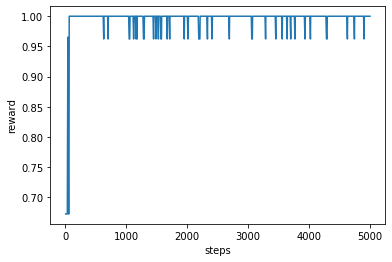

In [20]:
plt.plot(hist.history['nb_steps'],hist.history['episode_reward'])
plt.xlabel("steps")
plt.ylabel("reward")

In [10]:
dqn.test(env, visualize = True)

Testing for 1 episodes ...
choice(2) - conversions: [0, 0.30971084184322467], reactors: [1]
choice(3) - conversions: [0, 0.30971084184322467, 0.6700337959849747], reactors: [1, 0]
choice(4) - conversions: [0, 0.30971084184322467, 0.6700337959849747, 0.9613537829016082], reactors: [1, 0, 1]
choice(5) - conversions: [0, 0.30971084184322467, 0.6700337959849747, 0.9613537829016082, 1], reactors: [1, 0, 1, 1]
Episode 1: reward: 1.000, steps: 4


In [11]:
env.reactor_seq, env.X

([1, 0, 1, 1],
 [0, 0.30971084184322467, 0.6700337959849747, 0.9613537829016082, 1])

In [12]:
y = [] 
x = []
CSTR = []
PFR = []
for i in range(0, 50):
    x.append(i/50)
    CSTR.append(env.equation_solver(0, x[i]))
    PFR.append(env.equation_solver(1, x[i]))

Text(0, 0.5, 'x next')

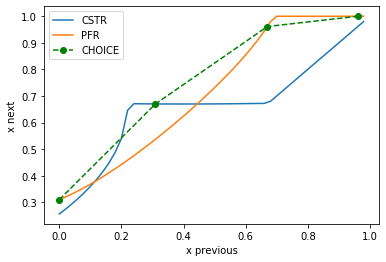

In [13]:
x_sim = env.X[0:-1]
choice = env.X[1:]
plt.plot(x, CSTR)
plt.plot(x, PFR)
plt.plot(x_sim, choice, '--go')
plt.legend(["CSTR", "PFR", "CHOICE"])
plt.xlabel("x previous")
plt.ylabel("x next")

In [13]:
??dqn

In [39]:
??env

In [10]:
??dqn.fit

In [9]:
??dqn.forward

In [24]:
??SequentialMemory